# Matteo Zortea, Alessandro Rizzi  
## Brain Inspired Computing - Sheet 2  
## Group G3A8  
### Exercises solved  
Ex 1: a) b) c)  
Ex 2: a) b)  
Ex 3: 1) 2) 3) 4)  
Ex 4: a) b) c) d)


# Exercise 1  
The LIF model is described by a differential equation of the type
\begin{equation}
    C_m \, \frac{du(t)}{dt} = g_L \, \left(E_L - u(t)\right) + I_{ext}(t)
\end{equation}
when the membrane potential is below the treshold value $u_{th}$.  
If one then wants to take account of various effects such as inhibitory or excitatory pre-synaptic inputs, spike rate adaption or refractary periods, one can add more terms to equation (1), but the equation can always be recasted into one that is formally analogue to (1), as we will show in exercise 2. Hence we can solve equation (1) having in mind that more complex equations have the same solution, formally speaking.  
It is convenient to work in the Laplace's domain. The differential equation becomes
\begin{equation*}
    s \tilde u(s) - u(0) = \frac{E_L}{s\tau} - \frac{\tilde u(s)}{\tau} + \frac{\tilde I_{ext}(s)}{C_m}
\end{equation*}
where we have defined $\tau \equiv C_m/g_L$. The last equation can be rearranged into
\begin{equation*}
    \tilde u(s) = \frac{u(0)}{s+1/\tau} + \frac{E_L}{s \tau (s+1/\tau)} + \frac{\tilde I(s)}{C_m(s+1/\tau)} = \frac{u(0)}{s+1/\tau} +  E_L \left(\frac{1}{s} - \frac{1}{s + 1/\tau} \right)+ \frac{\tilde I(s)}{C_m(s+1/\tau)}
\end{equation*}

We can now proceed by antitransforming
\begin{equation}
    u(t) = u_(t=0) e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \mathcal{L}^{-1} \left[\frac{\tilde I(s)}{C_m(s+1/\tau)}\right]
\end{equation}

We have now two ways of solving the equation. One is to calculate the transform of the input current, pop it in the last formula and then antitransform the last term. The other one consists in using directly the time expression of the input current and make use of the convolution property of the Laplace transform $\mathcal{L}^ (f \star g) = \mathcal{L}[f] \cdot \mathcal{L}[f]$ which yields
\begin{equation*}
    u(t) = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{1}{C_m} \int_0^t I(t') \, e^{-(t-t')/\tau} \, dt'
\end{equation*}

### a)  
We use the temporal expression of the current and we get directly
\begin{equation}
    u(t) = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{g_L} e^{-(t-t_0)/\tau}
\end{equation}

### b)   
\begin{gather*}
    u(t) = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{C_m} \int_{0}^t I(t') \, e^{-(t-t')/\tau} \ \Theta(t'-t_0) \, dt' = \\ 
    = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{C_m} \Theta(t-t_0) \ \int_{t_0}^t I(t') \, e^{-(t-t')/\tau} \, dt' = \\
    = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{C_m} \Theta(t-t_0) \left(1 - e^{-(t-t_0)/\tau}\right)
\end{gather*}

### c)  
It is clear from the convolution term that the result is an exponentially growing term with constant $\tau$ that gets counteracted by another exponential term with time constant $\tau_s$. Indeed
\begin{gather*}
    u(t) = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{\tau_s g_L} \Theta(t-t_0) \int_{t_0}^t \exp\left(\frac{t_0-t'}{\tau_s} + \frac{t'-t}{\tau}\right) \, dt' = \\
    = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{\tau_s g_L} \Theta(t-t_0) \int_{t_0}^t \exp\left(t'(1/\tau-1/\tau_s)\right) \, \exp\left(t_0/\tau_s - t/\tau\right) \, dt' = \\
    = u_(t=0) \, e^{-t/\tau} + E_L \left(1 - e^{-t/\tau}\right) + \frac{I_0}{g_L} \frac{\tau}{\tau_s - \tau} \, \Theta(t-t_0) \, \left[\exp\left(-(t-t_0)/\tau_s\right) - \exp\left(-(t-t_0)/\tau\right)\right]
\end{gather*}
If $\tau_s \to +\infty$ (i.e. the counterating terms never enters in action) we obtain result b).  
The qualitative plots follow (arbitatry units)

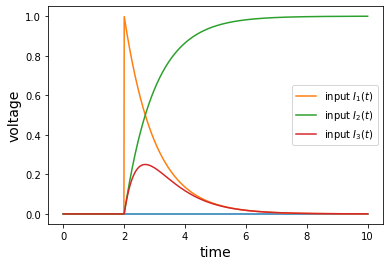

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 

EL = 0
u0 = EL
tau = 1
t0 = 2
tau_s = 0.5
tau_eff = tau_s*tau/(tau_s-tau)

t = np.linspace(0,10,1000)

def f0(t):
    return u0*np.exp(-t/tau) + EL*(1-np.exp(-t/tau))

def f1(t):
    ret = []
    for tt in t:
        if tt < t0:
            ret.append(f0(tt))
        else:
            ret.append(f0(tt) + np.exp(-(tt-t0)/tau))
    return ret

def f2(t):
    ret = []
    for tt in t:
        if tt < t0:
            ret.append(f0(tt))
        else:
            ret.append(f0(tt) + (1 - np.exp(-(tt-t0)/tau)))
    return ret

def f3(t):
    ret = []
    for tt in t:
        if tt < t0:
            ret.append(f0(tt))
        else:
            ret.append(f0(tt) + tau_s/(tau_s-tau) * (np.exp(-(tt-t0)/tau_s) - np.exp(-(tt-t0)/tau)))
    return ret

plt.plot(t, f0(t))
plt.plot(t, f1(t), label=r'input $I_1(t)$')
plt.plot(t, f2(t), label=r'input $I_2(t)$')
plt.plot(t, f3(t), label=r'input $I_3(t)$')
plt.xlabel('time', fontsize=14)
plt.ylabel('voltage', fontsize=14)
plt.legend()
plt.show()

## Additional note  
If we take again the differential equation, we define $u - E_L = v$ (hence $\frac{dv}{dt} = \frac{du}{dt}$) and we set $v(0) = 0$, the solution of the differential equation in the Laplace domain becomes
$$ \tilde v(s) = \frac{1}{C_m \tau} \frac{\tilde I(s)}{s + 1/\tau} = \frac{1/\tau}{s+1/\tau} \frac{\tilde I(s)}{C_m} \equiv \frac{\omega_0}{s+\omega_0} \, \tilde v_{in}(s)$$
we get the transfer function $H(s) = \frac{\tilde v_{out}(s)}{\tilde v_{in}(s)}$ of a low pass filter with cutoff frequency $\omega_0 = \frac{1}{\tau}$. The transfer funciton has just one pole and lies in the left half plane, hence the system is stable, and indeed we saw in point a) that after a small perturbation, it returns to the equilibrium point.

# Exercise 2  
### a)
\begin{equation*}
    C_m \dot u = g_L (E_L - u) + g_{exc} (E_{exc} - u) + g_{inh} (E_{inh} - u) + I_{ext}
\end{equation*}

\begin{equation*}
    C_m \dot u = g_L E_L + g_{exc} E_{exc} + g_{inh} E_{inh} + I_{ext} - \left(g_L + g_{exc} + g_{inh}\right) u
\end{equation*}
which means
\begin{equation*}
    \dot u = \frac{g_L + g_{exc} + g_{inh}}{C_m} \ \left(\frac{g_L E_L + g_{exc} E_{exc} + g_{inh} E_{inh} + I_{ext}}{g_L + g_{exc} + g_{inh}} - u\right) \equiv \frac{1}{\tau_{eff}} \left(U_{eff} - u\right)
\end{equation*}
where we have set 
\begin{equation*}
    \tau_{eff} \equiv \frac{C_m}{g_L + g_{exc} + g_{inh}} \qquad U_{eff} \equiv \frac{g_L E_L + g_{exc} E_{exc} + g_{inh} E_{inh} + I_{ext}}{g_L + g_{exc} + g_{inh}}
\end{equation*}

### b)

Each term of the type $\frac{1}{\tau} \left(E - u\right)$ that appears on the right hand side of the differential equation, has the effect of "driving" u towards $E$ with a typical time $\tau$. When we sum up three terms of this type, as in the differential equation of the COBA LIF, we have that each of them drives $u$ towards a different voltage value (respectively $E_L, E_{exc}, E_{inh}$) with different time constants (respectively $\tau, \tau_{exc}, \tau_{inh}$). The net effect is equivalent to just one term that drives $u$ towards $U_{eff} = \frac{g_L E_L + g_{exc} E_{exc} + g_{inh} E_{inh} + I_{ext}}{g_L + g_{exc} + g_{inh}}$ with time constant $\tau_{eff} = \frac{C_m}{g_L + g_{exc} + g_{inh}}$.  
Thus, this is not always the case, since the excitatory and inhibitory conductances depend on time and are proportional to functions of the type 
$$ K(t) = \sum_{s} \theta(t - \Delta t_s) e^{(t - \Delta t_s)/\tau_i}$$
This means that when we get and inhibitory or excitatory spikes, the corresponding conductances get "activated", but they exponentially decay to a zero value with a time constant $\tau_{exc}, \tau_{inh}$.  
When excitatory inputs are given, $U_{eff} > E_L$, hence the system is driven towards a higher potential and results, eventually, in crossing the threshold (we actually need two consectutive spikes for this). Thus, if we give an inhibitory input before an excitatory one, we "active" the inihibitory conductance, hence the term that drives the potential to a lower value that $E_L$, and the net effect is that the system cannot reach the treshold value. This is both due to that $E_{inh}$ is low compared to $E_{th}$ but also because $\tau_{exc}$ is not long enough compared to $\tau_{inh}$, otherwise the exciting term would have "survived" also after the inhibitory one disappeared.

# Exercise 3

## a)
We start by loading the dataset and plotting them

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the dataset
weak = np.load('cobaSynapse_V_weak.npy')
medium = np.load('cobaSynapse_V_medium.npy')
strong = np.load('cobaSynapse_V_strong.npy')


#creates a time arry for the sampling
nu = 10**4  #Hz
tmax = len(strong)/nu
t = np.arange(0,tmax, 1/nu)

#creates time array for the probe spikes
ts = np.arange(0.02,tmax, 0.02)

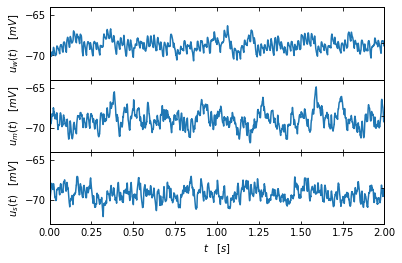

In [4]:
#plot of the noisy membrane potentials. Note that the y-axis has the same scale and limits for all the plots
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)


ax1.set(ylabel='$u_{w}(t)\quad [mV]$',xlim=[0,2],ylim=[-73,-64])   
ax1.plot(t,weak, label = 'weak') # plot of the analytical solution
ax1R = ax1.twinx()
ax1T = ax1.twiny()
ax1T.set(xlim=[0,2])
ax1.tick_params(direction='in')
ax1T.tick_params(direction='in')
ax1R.tick_params(direction='in')
ax1R.yaxis.set_major_formatter(plt.NullFormatter())
ax1T.xaxis.set_major_formatter(plt.NullFormatter())

ax2.set(ylabel='$u_{m}(t)\quad [mV]$',xlim=[0,2],ylim=[-73,-64])   
ax2.plot(t,medium, label = 'weak') # plot of the analytical solution
ax2R = ax2.twinx()
ax2T = ax2.twiny()
ax2T.set(xlim=[0,2])
ax2.tick_params(direction='in')
ax2T.tick_params(direction='in')
ax2R.tick_params(direction='in')
ax2R.yaxis.set_major_formatter(plt.NullFormatter())
ax2T.xaxis.set_major_formatter(plt.NullFormatter())

ax3.set(xlabel='$t \quad [s]$',xlim=[0,2],ylim=[-73,-64])
ax3.set(ylabel='$u_{s}(t)\quad [mV]$')   
ax3.plot(t,strong, label = 'weak') # plot of the analytical solution
ax3R = ax3.twinx()
ax3T = ax3.twiny()
ax3T.set(xlim=[0,2])
ax3.tick_params(direction='in')
ax3T.tick_params(direction='in')
ax3R.tick_params(direction='in')
ax3R.yaxis.set_major_formatter(plt.NullFormatter())
ax3T.xaxis.set_major_formatter(plt.NullFormatter())

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## b)
We now average by time aligment on the spike train

In [5]:
t = np.arange(0,0.02, 1/nu)
N = int(len(weak)/len(t))

mean_weak = np.zeros(len(t))
mean_medium = np.zeros(len(t))
mean_strong = np.zeros(len(t))

for n in range(N):
    mean_weak += weak[n:n+len(t)]
    mean_medium += medium[n:n+len(t)]
    mean_strong += strong[n:n+len(t)]

## c) 
we now plot the averaged dataset. 

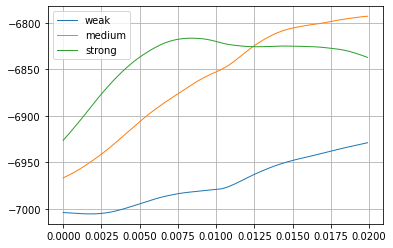

In [6]:

plt.plot(t, mean_weak, label= 'weak', linewidth= 1)
plt.plot(t, mean_medium,label= 'medium',linewidth= 1)
plt.plot(t, mean_strong,label= 'strong',linewidth= 1)
plt.legend()
plt.grid()
plt.show()
    
    

## d)
We can note that the strong background is the most rapid in responding to the spike, and that the low one is the slowest. That means that the times constants decrease with the background activity. We can also note taht the aplitude of the strong is bigger, and that is the only one that starts to decrease after the response. The amplitude of the low-backgound neuron response is significantly smaller than the others two, that are comparable. 

# Exercise 4

## a)
We start by simply running the given nest template without canging the parameters:

In [7]:
import nest
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

ModuleNotFoundError: No module named 'nest'

In [ ]:
def run_network(vrest, cm, ereve, erevi, gl, tausyne, tausyni, wconde, wcondi):
    nest.set_verbosity("M_ERROR")
    spkte = np.array([50., 100., 103., 106., 109., 112., 115., 118., 121., 124., 127.]) + 150.
    spkti = spkte + 150.
    
    neuron = nest.Create('iaf_cond_exp', {'V_m': vrest, 'E_L': vrest, 'C_m': cm, 'E_ex': ereve, 'E_in': erevi, 'g_L': gl, 'tau_syn_ex': tausyne, 'tau_syn_in': tausyni, 'V_th':100.})
    spikegeneratore = nest.Create('spike_generator')
    nest.SetStatus(spikegeneratore, {'spike_times': spkte})
    spikegeneratori = nest.Create('spike_generator')
    nest.SetStatus(spikegeneratori, {'spike_times': spkti})

    voltmeter = nest.Create('voltmeter', {'interval' :0.1})
    nest.Connect(spikegeneratore, neuron, syn_spec={'weight': wconde})
    nest.Connect(spikegeneratori, neuron, syn_spec={'weight': -wcondi})
    nest.Connect(voltmeter, neuron)
    nest.print_time = True

    nest.Simulate(50.1)
    nest.SetStatus(neuron, {'I_e': 0.2})
    nest.Simulate(100.1)
    nest.SetStatus(neuron, {'I_e': 0.})
    nest.Simulate(350.1)

    voltage = nest.GetStatus(voltmeter, 'events')[0]['V_m']

    nest.ResetKernel()
    return voltage

In [ ]:
data = np.load('membrane_trace_3.4_fixed.npy')[1:]

In [ ]:
def plot_comparison(v):
    global data
    plt.figure()
    t = np.arange(0,len(v)*dt,dt)
    plt.plot(t, v)
    t = np.arange(0, len(data)*0.1, 0.1)
    plt.plot(t, data)

In [ ]:
#known neuron parameters
cm = 1. # nF
ereve = 20. # mV
erevi = -80. # mV

# unknown neuron paramters (random values insertet here)
vrest = -50. # mV
wconde = .0031416 # uS
wcondi = .0031416 # uS
gl = 0.042 # uS
tausyne = 3.1416 # ms
tausyni = 2*3.1416 # ms

tsim = 500.
dt = 0.1

v = run_network(vrest, cm, ereve, erevi, gl, tausyne, tausyni, wconde, wcondi)

plot_comparison(v)

The most evident difference is the shift in the resting potential of about 20 mV. Then we can see that the amplitude of the displacemets around the resting potential is too large, and we should then increase $g_l$. We also note that the time constant for the exponential excitatory rise is too large, as well as the one for the exponential hinibitory decrease. We should then reduce $\tau_\text{eff}$ by increeasing the exciting and hinibitory conductance weights.  

## b)
We now try to change manually the parameters, following the observations made above:

In [ ]:
#known neuron parameters
cm = 1. # nF
ereve = 20. # mV
erevi = -80. # mV

# unknown neuron paramters (random values insertet here)
vrest = -70. # mV
wconde = .0031416*1.8 # uS
wcondi = .0031416*9.5 # uS
gl = 0.042*2.5 # uS
tausyne = 3.1416*0.6 # ms
tausyni = 2*3.1416*1.4# ms

tsim = 500.
dt = 0.1

v = run_network(vrest, cm, ereve, erevi, gl, tausyne, tausyni, wconde, wcondi)

plot_comparison(v)

We can note that by doing what observed in point a), and modifing in addition the rise and fall time constant, we obtain a far better agreement with the desired potential. 

## c)
We now optimize the parameters automatically:

In [ ]:
# compute the total squared difference between data and the simulated potential. Take as input the parameters to optimize. 
def distance(params):
    vrest = params[0]
    gl = params[1]
    tausyne = params[2] 
    tausyni = params[3] 
    wconde = params[4] 
    wcondi = params[5]
    return np.sum(np.power(data - run_network(vrest, cm, ereve, erevi, gl, abs(tausyne), abs(tausyni), wconde, wcondi), 2))

In [ ]:
from scipy.optimize import minimize as fit


res = fit(distance, np.array([vrest, gl, tausyne, tausyni, wconde, wcondi]))

In [ ]:
print("The optimazed parameters are:")
print("Vrest =", res.x[0], "mV")
print("wconde =", res.x[1], "uS")
print("wcondi =", res.x[2], "uS")
print("gl =", res.x[3], "uS")
print("tausyne =", res.x[4], "ms")
print("tausyni =", res.x[5], "ms")

## d)
We plot the simulation with the optimized parameters and the given one.

In [ ]:
plot_comparison(run_network(res.x[0], cm, ereve, erevi, res.x[1], res.x[2], res.x[3], res.x[4], res.x[5]))

The two curves are almost indistiguishable. We then plot the normalized difference in percentage:

In [ ]:
plt.plot(np.arange(0,len(v)*dt,dt), 100*(run_network(res.x[0], cm, ereve, erevi, res.x[1], res.x[2], res.x[3], res.x[4], res.x[5])-data)/data)
plt.xlabel("t ", fontsize=16)
plt.ylabel(r"$\epsilon$", fontsize=16)
plt.show